In [1]:
import tensorflow as tf

 # Loading - " MNIST Dataset "

 # Containing Training samples = 60,000 , Testing Samples = 10,000

 ## TensorFlow already contain MNIST data set which can be loaded using Keras

In [2]:
mnist = tf.keras.datasets.mnist  ## This is basically handwritten characters based on 28*28 sized images 0 to 9

## After loading the MNIST data ,Divide into train and test datasets 

In [3]:
##unpacking the dataset into train and test datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

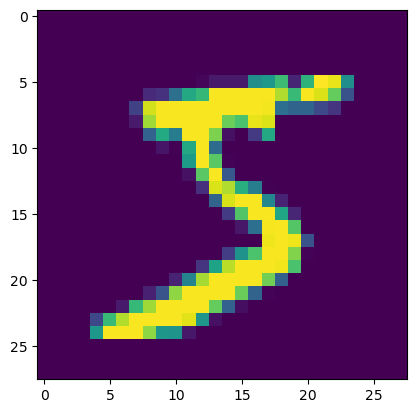

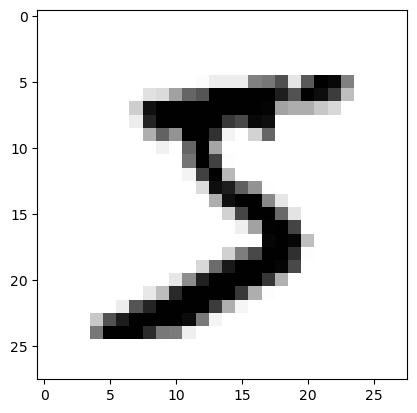

In [5]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[0])
plt.show()
#however  we dont know whether its colored image or binary image
#inorder to plot it to change the configuration
plt.imshow(x_train[0],cmap = plt.cm.binary)

## Checking the values of each pixel

## Before Normalization 

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## As images are in Gray level (1 channel ==> 0 to 255),not colored (RGB)

# Normalizing the data ! Pre-processing Step

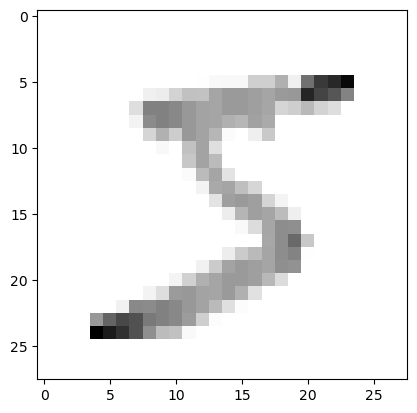

In [7]:
## you might have noticed that, its gray image and all values varies form 0 to 255
## in order to normalize it
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [8]:
print(x_train[0]) ## you can see all values are now noramlized.  

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


## Resizing image to make it suitable fo apply Convolution operation

In [10]:
import numpy as np
IMG_SIZE= 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE, IMG_SIZE,1) ## Increasing one dimension for kernel operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE,1)
print("Training Samples dimensions",x_trainr.shape)
print("Testing Samples dimension",x_testr.shape)

Training Samples dimensions (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


# Creating a Deep Neural Network

## Training on 60,000 samples of MNIST handwritten dataset

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Activation, Flatten, Conv2D, MaxPooling2D

In [12]:
## Creating a neural networks are
model = Sequential()

## First Convolution layer 0 1 2 3 (60000, 28, 28,1)
model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

## second convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##Third convultion layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

##Fully connected layer
model.add(Dense(32))
model.add(Activation("relu"))

##Last fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [14]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [16]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 62s 45ms/step - loss: 0.3255 - accuracy: 0.8973 - val_loss: 0.1228 - val_accuracy: 0.9613
Epoch 2/5
1313/1313 [==============================] - 59s 45ms/step - loss: 0.1031 - accuracy: 0.9683 - val_loss: 0.0944 - val_accuracy: 0.9706
Epoch 3/5
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0722 - accuracy: 0.9777 - val_loss: 0.1088 - val_accuracy: 0.9664
Epoch 4/5
1313/1313 [==============================] - 53s 41ms/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0761 - val_accuracy: 0.9762
Epoch 5/5
1313/1313 [==============================] - 53s 41ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.0743 - val_accuracy: 0.9797


In [17]:
test_loss,test_acc=model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples",test_loss)
print("validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0689 - accuracy: 0.9819
Test loss on 10,000 test samples 0.06886943429708481
validation Accuracy on 10,000 test samples 0.9818999767303467


In [18]:
predictions = model.predict([x_test])

313/313 [==============================] - 4s 11ms/step


In [19]:
print(predictions)

[[1.04854780e-09 2.92263849e-07 1.00762918e-08 ... 9.99999642e-01
  7.64380670e-10 2.50298413e-08]
 [2.55089108e-05 3.47490669e-07 9.99969482e-01 ... 3.09745019e-07
  1.04224785e-06 1.46885995e-07]
 [1.38908955e-08 9.99999285e-01 1.06816611e-09 ... 4.89040929e-07
  3.56625449e-08 3.40178019e-09]
 ...
 [2.46374454e-09 8.16433854e-09 1.89634572e-10 ... 9.90420301e-10
  4.67555488e-08 4.42369674e-06]
 [3.36167053e-04 2.23151297e-09 2.14445066e-08 ... 6.46407106e-09
  1.49693820e-04 5.75918833e-08]
 [3.64570878e-05 1.71777193e-11 1.56388035e-06 ... 1.88634091e-11
  6.21306754e-07 1.82410744e-07]]


In [20]:
## convert the predcitions from one hot encoding , we need to use numpy
print(np.argmax(predictions[0]))

7


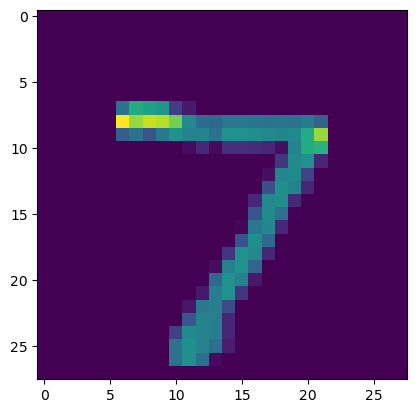

In [21]:
## Now check whether the ans is  true or not
plt.imshow(x_test[0])

In [22]:
## Now checking random number
print(np.argmax(predictions[125]))

9


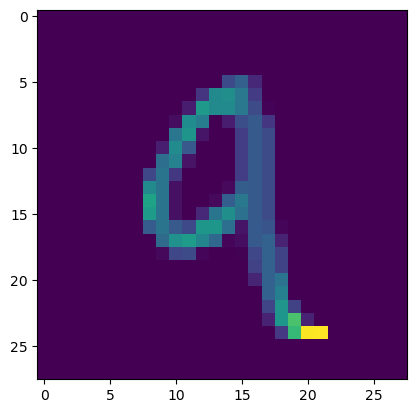

In [23]:
plt.imshow(x_test[125])

In [24]:
# checking for handwritten digits by user
import cv2

In [25]:
img = cv2.imread('Eight.png')

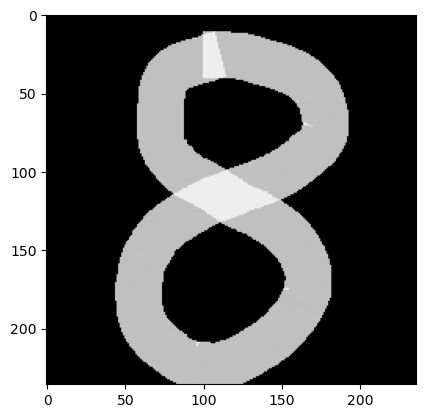

In [26]:
plt.imshow(img)

In [27]:
img.shape

(236, 236, 3)

In [28]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [29]:
gray.shape

(236, 236)

In [30]:
resized = cv2.resize(gray, (28,28),interpolation = cv2.INTER_AREA)

In [31]:
resized.shape

(28, 28)

In [32]:
newimg = tf.keras.utils.normalize (resized, axis=1)

In [33]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [34]:
newimg.shape

(1, 28, 28, 1)

In [35]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 224ms/step


In [36]:
print(np.argmax(predictions))

8


## That's all about a handwritten recognition system


